<a href="https://colab.research.google.com/github/eidkadri/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

This project aims to classify iris flowers using machine learning techniques.

## Goals:
1. Load and explore data
2. Visualize data
3. Apply classification algorithms (Decision Tree, SVM)
4. Evaluate model performance

## Dataset:
Features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Target classes:
- Setosa
- Versicolor
- Virginica


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = [target_names[i] for i in y]

# Show first 5 rows
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Dataset info
print("Samples:", X.shape[0])
print("Features:", X.shape[1])
print("Feature names:", feature_names)
print("Target classes:", target_names)


Samples: 150
Features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [4]:
# Descriptive statistics
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# Missing values
iris_df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
species,0


/tmp/ipython-input-285676936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris_df, palette='viridis')


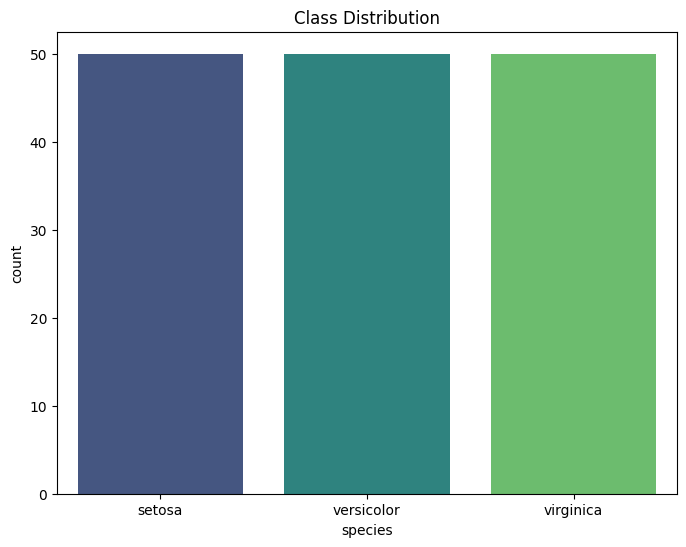

In [6]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris_df, palette='viridis')
plt.title('Class Distribution')
plt.show()


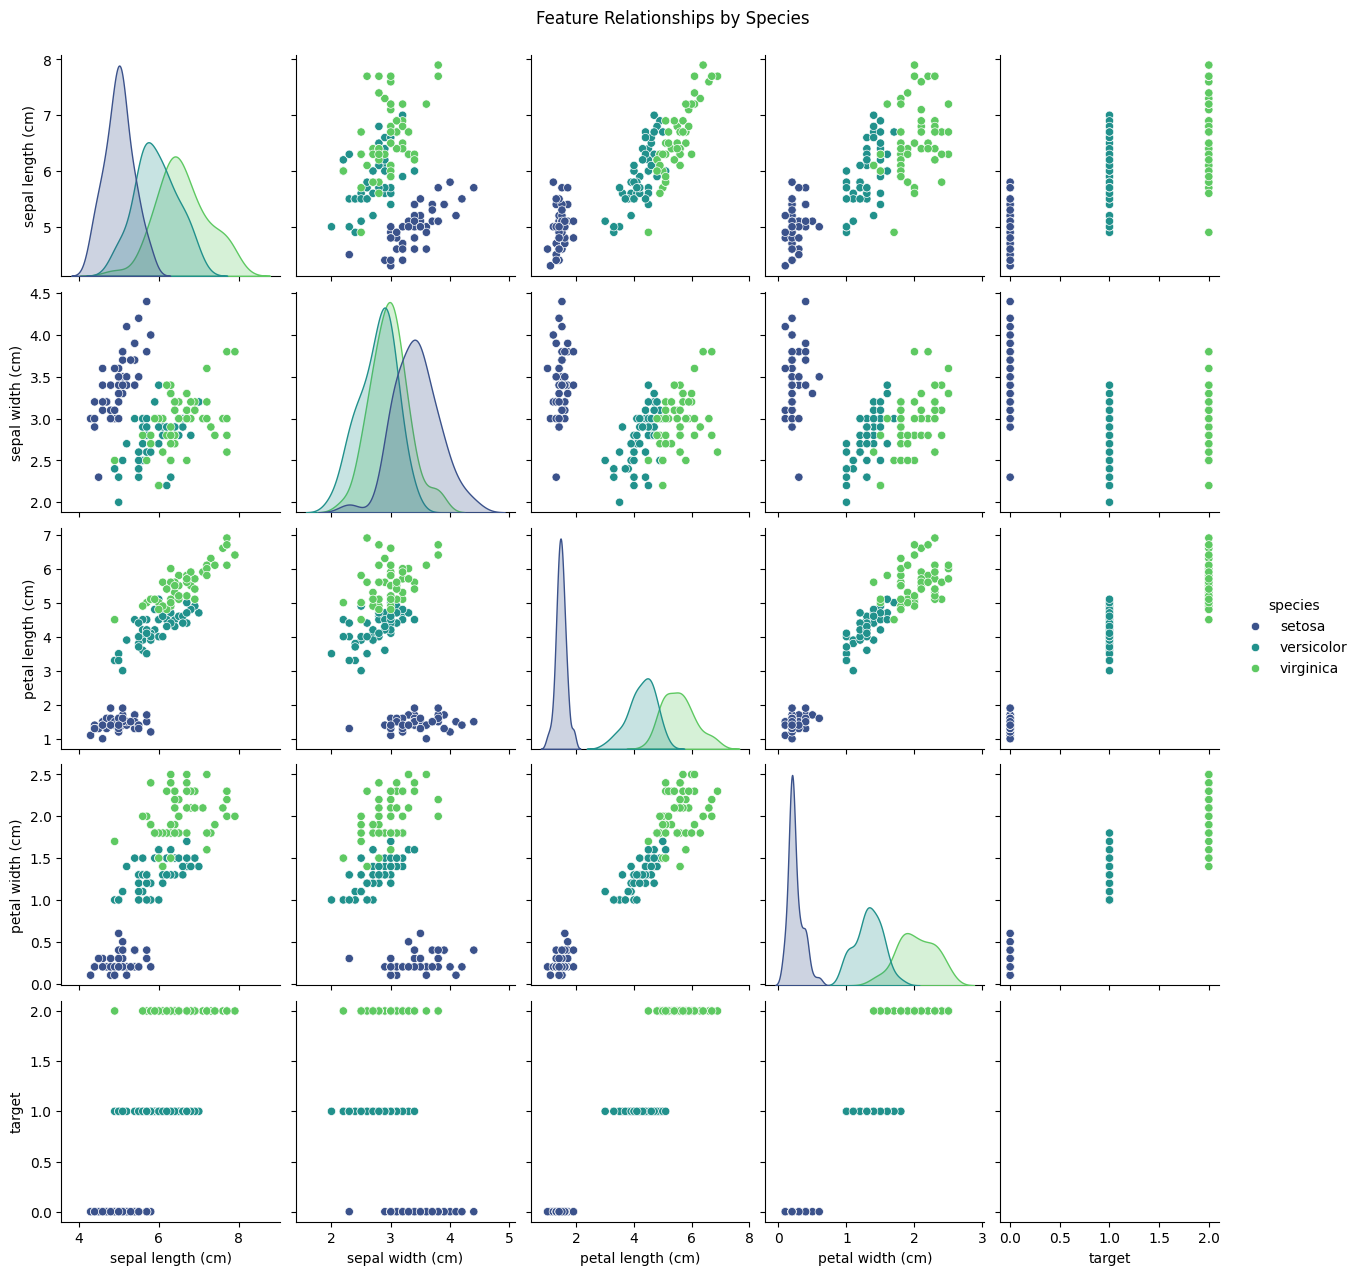

In [7]:
# Pairplot
sns.pairplot(iris_df, hue='species', palette='viridis', height=2.5)
plt.suptitle('Feature Relationships by Species', y=1.02)
plt.show()


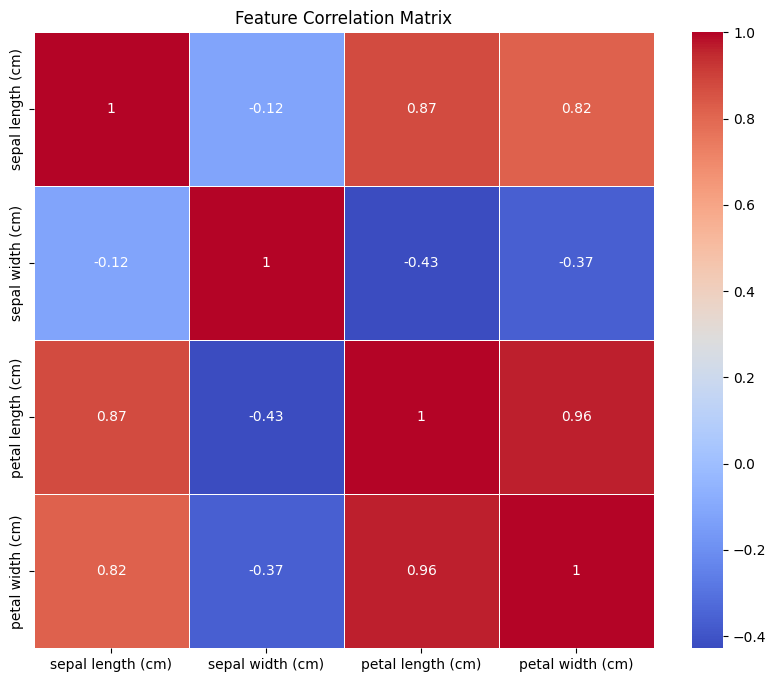

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = iris_df.iloc[:, :4].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


/tmp/ipython-input-225857833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[row, col], palette='viridis')
/tmp/ipython-input-225857833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[row, col], palette='viridis')
/tmp/ipython-input-225857833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[row, col], palette='viridis')
/tmp/ipython-input-225857833.py:6: FutureWarning: 

Passing `palette` withou

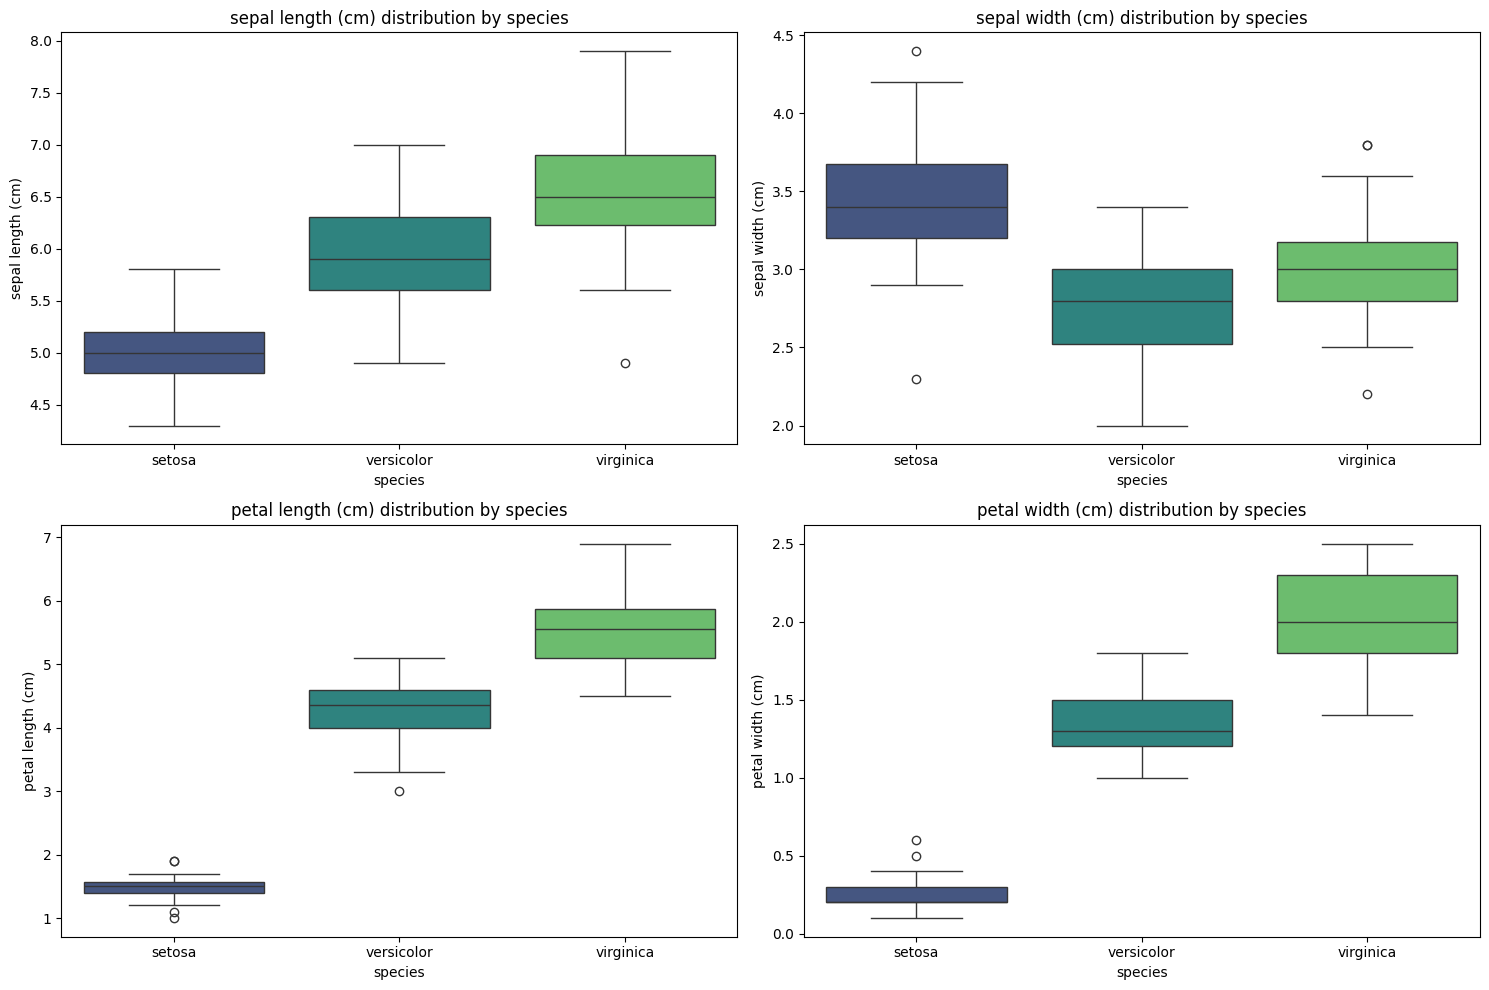

In [9]:
# Boxplots per feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(feature_names):
    row, col = i // 2, i % 2
    sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{feature} distribution by species')

plt.tight_layout()
plt.show()


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (105, 4)
Test size: (45, 4)


In [11]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

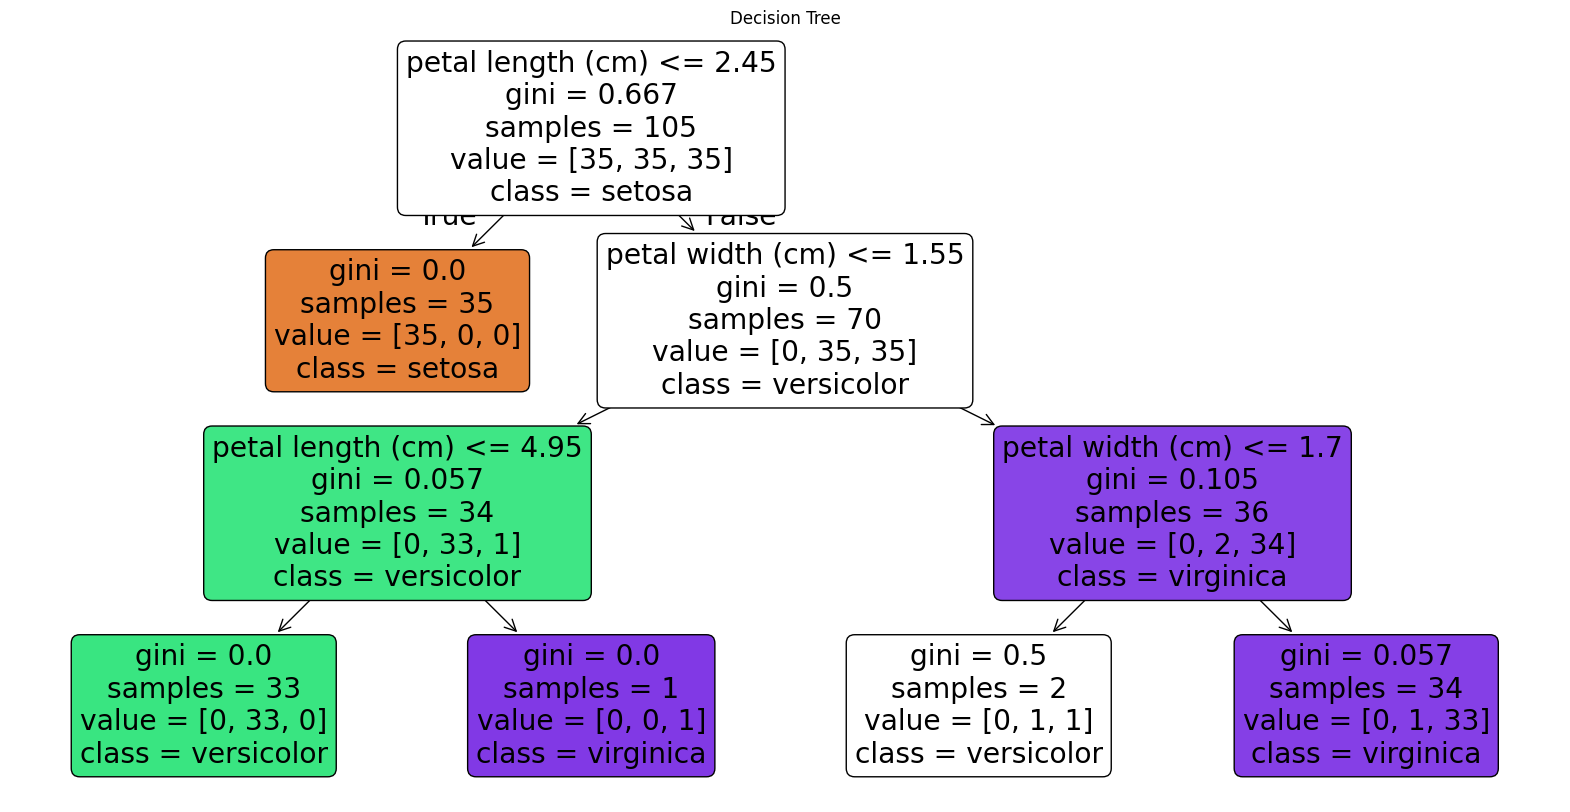

In [12]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()


In [13]:
# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [14]:
# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)


In [15]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Decision Tree Accuracy: 0.9778
SVM Accuracy: 1.0000


In [16]:
# Classification reports
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))

print("SVM Report:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))


Decision Tree Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

SVM Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



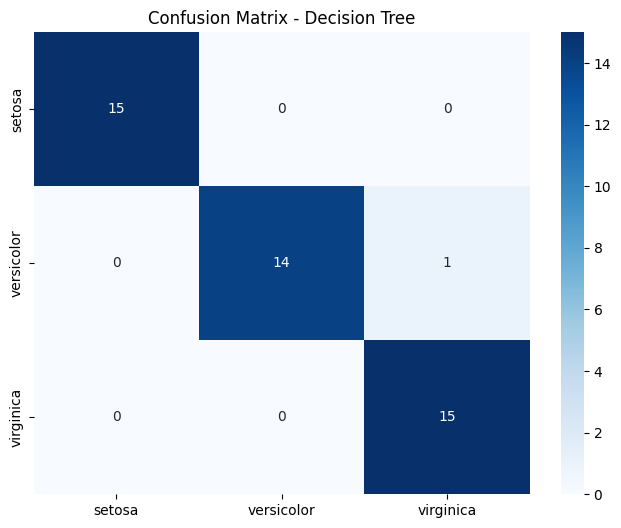

In [17]:
# Confusion Matrix - Decision Tree
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.show()


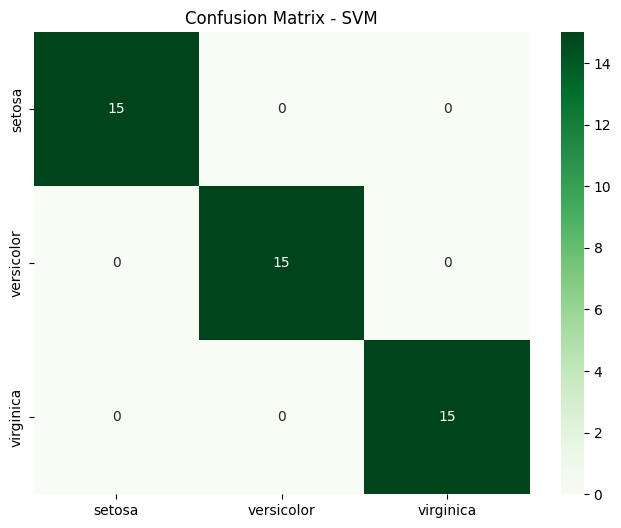

In [18]:
# Confusion Matrix - SVM
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - SVM')
plt.show()


In [19]:
# Test on new samples
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],   # Expected Setosa
    [6.0, 2.7, 5.1, 1.6],   # Expected Virginica
    [5.5, 2.4, 3.8, 1.1]    # Expected Versicolor
])

new_pred_dt = dt_model.predict(new_data)
new_pred_svm = svm_model.predict(new_data)

print("Decision Tree Predictions:")
for i, pred in enumerate(new_pred_dt):
    print(f"Sample {i+1}: {target_names[pred]}")

print("\nSVM Predictions:")
for i, pred in enumerate(new_pred_svm):
    print(f"Sample {i+1}: {target_names[pred]}")


Decision Tree Predictions:
Sample 1: setosa
Sample 2: versicolor
Sample 3: versicolor

SVM Predictions:
Sample 1: setosa
Sample 2: virginica
Sample 3: versicolor


/tmp/ipython-input-3250989865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='rocket')


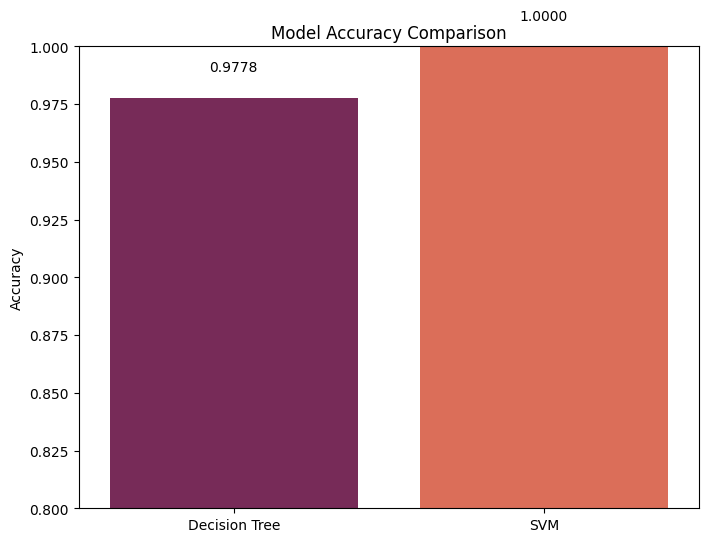

In [20]:
# Compare models
models = ['Decision Tree', 'SVM']
accuracies = [dt_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='rocket')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


In [21]:
# Conclusions
print("## Conclusions:")
print(f"- Decision Tree accuracy: {dt_accuracy:.4f}")
print(f"- SVM accuracy: {svm_accuracy:.4f}")
print("- Both models perform very well on the Iris dataset")
print("- Iris dataset is small and balanced, suitable for many classification algorithms")


## Conclusions:
- Decision Tree accuracy: 0.9778
- SVM accuracy: 1.0000
- Both models perform very well on the Iris dataset
- Iris dataset is small and balanced, suitable for many classification algorithms
